In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import copy
import scipy.linalg as la

# Integracion numerica

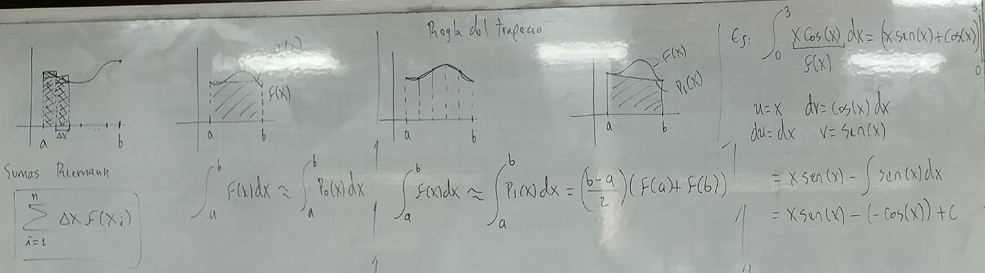

error:  39.41338152142777
0.44968435038131016
0.27244854172337035


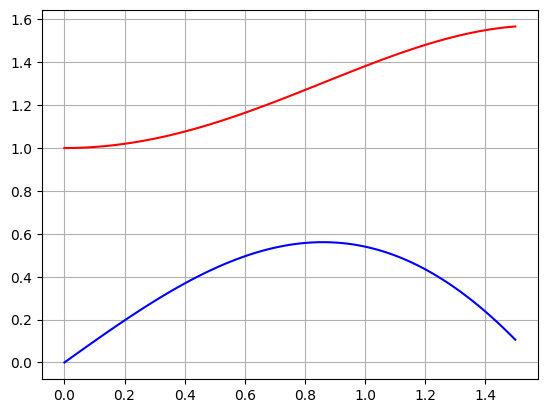

In [ ]:
def f(x):
  return x*np.cos(x)
def anti_der(x):
  return x*np.sin(x)+np.cos(x)
x = np.linspace(0,1.5,100)
plt.plot(x, f(x), "b")
plt.plot(x, anti_der(x), "r")
plt.grid()
ap = (1.5-0.5)/2*(f(1.5)+f(0.5))
real = anti_der(1.5)-anti_der(0.5)
error = abs(ap-real)/real*100
print("error: ", error)
print(real)
print(ap)

#Regla del trapecio: aplicacion multiple

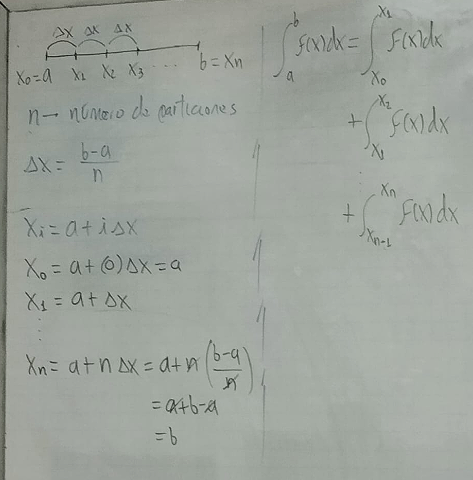

In [ ]:
# f funcion en el integrando
#[a,b] limites de integracion
# (n - 1 ) numero de particiones (n - numero de puntos)
def regla_trapecio(f,a,b,n):
  x = np.linspace(a,b,n)
  suma = 0
  for i in range(0, n-1,1):
    suma += (x[i+1]-x[i])/2*(f(x[i])+f(x[i+1]))
  return suma

ap = regla_trapecio(f,0.5,1.5,100)
print(ap)
real = anti_der(1.5)-anti_der(0.5)
ap = (1.5-0.5)/6*(f(1.5)+4*f((1.5+0.5)/2)+f(0.5))
error = abs(ap-real)/real*100
print(error)
print(ap)
print(real)

0.44966680641195583
0.296511861585248
0.4510177178198833
0.44968435038131016


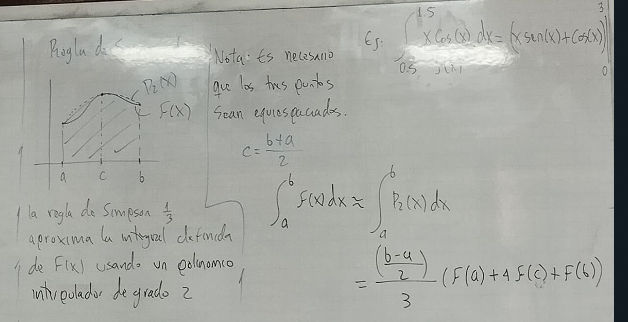

In [ ]:
# f funcion en el integrando
#[a,b] limites de integracion
# (n - 1 ) numero de particiones (n - numero de puntos)
# n impar
def regla_sipmson(f,a,b,n):
  if n%2 != 0:
    x = np.linspace(a,b,n)
    suma = 0
    for i in range(0, int((n-1)/2),1):
      suma += (x[2*i+2]-x[2*i])/6*(f(x[2*i])+4*f(x[2*i+1])+f(x[2*i+2]))
    return suma
  else:
    print("n debe ser impar")


ap = regla_sipmson(f,0.5,1.5,3)
print(ap)
real = anti_der(1.5)-anti_der(0.5)
ap = (1.5-0.5)/6*(f(1.5)+4*f((1.5+0.5)/2)+f(0.5))
error = abs(ap-real)/real*100
print(error)
print(ap)
print(real)

0.4510177178198833
0.296511861585248
0.4510177178198833
0.44968435038131016


# Metodo del trapecio

In [ ]:
def tabla_trapecio(x, y):
  sum = 0
  for i in range(len(x)-1):
    sum += ((x[i+1]-x[i])/2)*(y[i+1]+y[i])
  return sum

x = np.array([0.0,0.12,0.22,0.32,0.36,0.40,0.44,0.54,0.64])
y = np.array([0.200,1.309,1.305,1.743,2.075, 2.456, 2.842, 3.507, 3.182])
print(tabla_trapecio(x,y))

1.29848


In [ ]:
def simpson(f, n, a, b): # modificar algun dia verificar si son impares y x espaciadas, si cumple usar la funcion y si no redireccionar a la funcion trapecio_tabla
  n *= 2
  divisiones = np.linspace(a, b, n+1)
  sum = 0
  for i in range(0, len(divisiones)-2, 2):
    sum += (divisiones[i+2]-divisiones[i])/6*(f(divisiones[i])+ 4*f(divisiones[i+1])+ f(divisiones[i+2]))
  return sum

Unidad 7

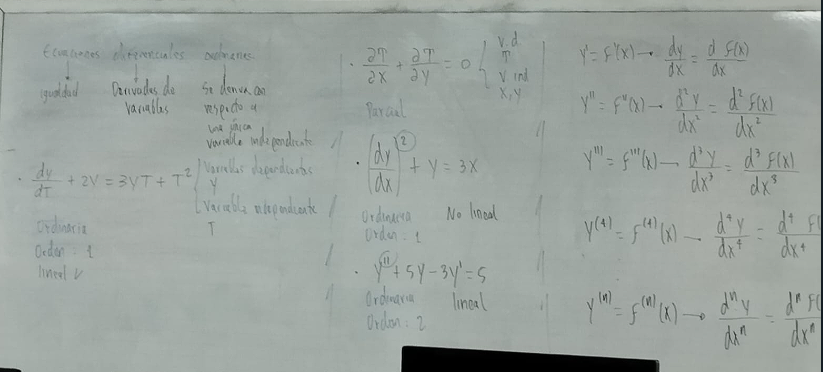

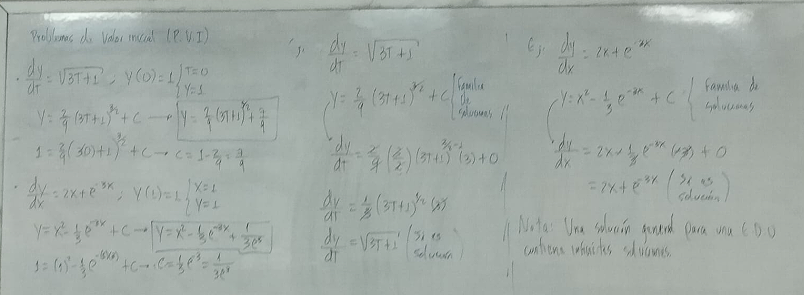

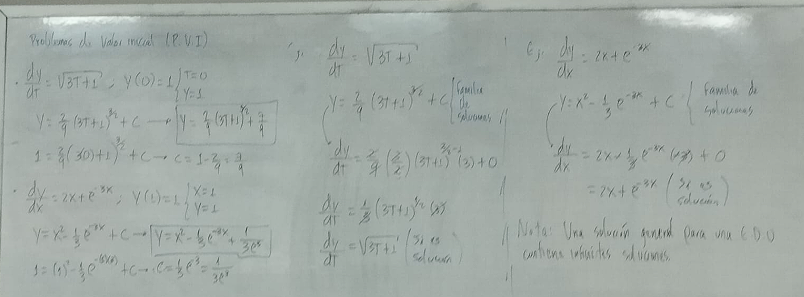

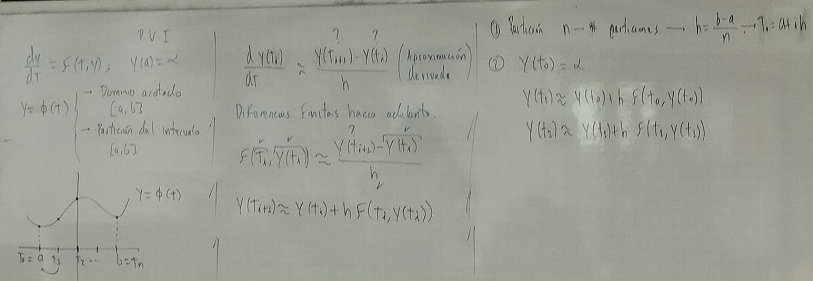

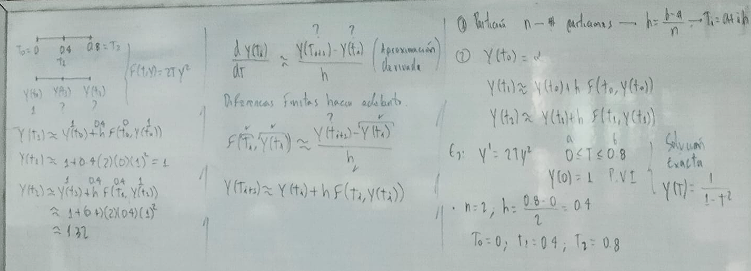

In [ ]:
# f funcion funte, a, b limites de tiempo.
# n numero de particiones, ci condicion inicial

def edo_Euler(f, a, b, n, ci):
  t = np.linspace(a, b, n+1)
  y_apro = t*0
  y_apro[0] = ci
  h = (b-a)/n
  for i in range(n):
    y_apro[i+1] = y_apro[i] + h*f(t[i], y_apro[i])
  return t, y_apro

def f(t, y):
  return 2*t*y**2

def exa(t):
  return 1/(1-t**2)

y = edo_Euler(f, 0, 0.8, 2, 1)
print(y)


(array([0. , 0.4, 0.8]), array([1.  , 1.  , 1.32]))


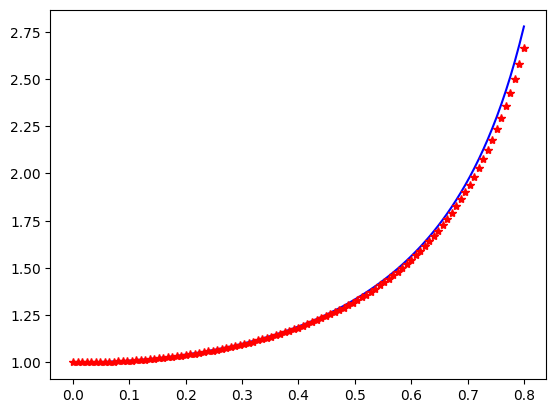

1.9974991485542315


In [ ]:

[t2, y2] = edo_Euler(f, 0, 0.8, 100, 1)
plt.plot(t2, exa(t2), "b")
plt.plot(t2, y2, "r*")
plt.show()

error = np.linalg.norm(exa(t2)-y2,2)/np.linalg.norm(exa(t2),2)*100
print(error)

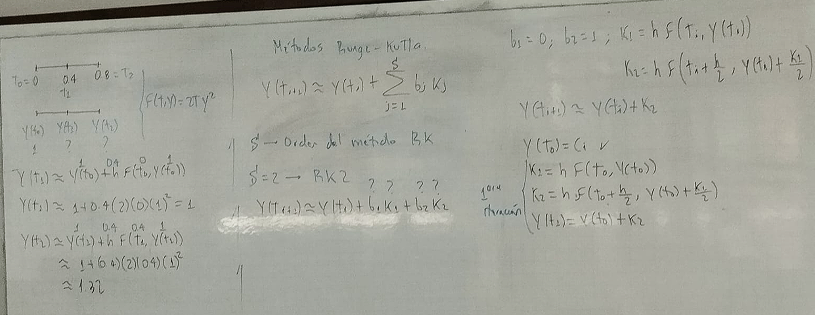

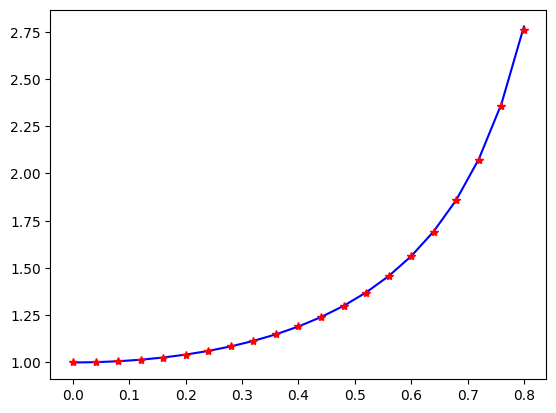

0.29375209289017784


In [ ]:
def edo_RK2(f, a, b, n, ci):
  t = np.linspace(a, b, n+1)
  y_apro = t*0
  y_apro[0] = ci
  h = (b-a)/n
  for i in range(n):
    k1 = f(t[i], y_apro[i]) # h * f(t[i], y_apro[i])
    k2 = f(t[i] + h, y_apro[i] + h*k1) # h * f(t[i] + h/2, y_apro[i] + k1 / 2)
    y_apro[i+1] = y_apro[i] + h*(k1 + k2)/2 # y_apo[i] + k2
  return t, y_apro

[t2, y2] = edo_RK2(f, 0, 0.8, 20, 1)
plt.plot(t2, exa(t2), "b")
plt.plot(t2, y2, "r*")
plt.show()

error = np.linalg.norm(exa(t2)-y2,2)/np.linalg.norm(exa(t2),2)*100
print(error)

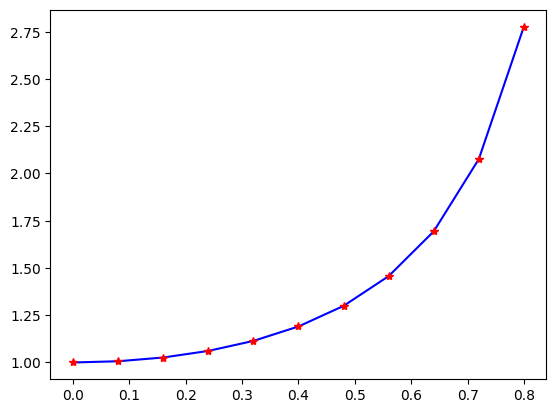

0.005502169008069551


In [ ]:


import matplotlib.pyplot as plt
import numpy as np
def edo_RK4(f, a, b, n, ci):
  t = np.linspace(a, b, n+1)
  y_apro = t*0
  y_apro[0] = ci
  h = (b-a)/n
  for i in range(n):
    k1 = f(t[i], y_apro[i])
    k2 = f(t[i] + h/2, y_apro[i] + h/2*k1)
    k3 = f(t[i] + h/2, y_apro[i] + h/2*k2)
    k4 = f(t[i+1], y_apro[i] + h*k3)
    y_apro[i+1] = y_apro[i] + h*(k1 + 2*k2 + 2*k3 + k4)/6
  return t, y_apro

[t2, y2] = edo_RK4(f, 0, 0.8, 10, 1)
plt.plot(t2, exa(t2), "b")
plt.plot(t2, y2, "r*")
plt.show()


error = np.linalg.norm(exa(t2)-y2,2)/np.linalg.norm(exa(t2),2)*100
print(error)


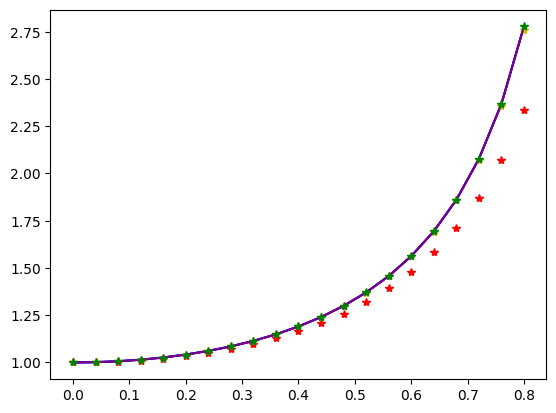

9.043905910175559
0.29375209289017784
0.00024826084329655236


In [ ]:
[t1, y1] = edo_Euler(f, 0, 0.8, 20, 1)
plt.plot(t1, exa(t1), "b")
plt.plot(t1, y1, "r*")
[t2, y2] = edo_RK2(f, 0, 0.8, 20, 1)
plt.plot(t2, exa(t2), "b")
plt.plot(t2, y2, "y*")
[t3, y3] = edo_RK4(f, 0, 0.8, 20, 1)
plt.plot(t3, exa(t3), "purple")
plt.plot(t3, y3, "g*")
plt.show()


error = np.linalg.norm(exa(t1)-y1,2)/np.linalg.norm(exa(t1),2)*100
print(error)

error = np.linalg.norm(exa(t2)-y2,2)/np.linalg.norm(exa(t3),2)*100
print(error)

error = np.linalg.norm(exa(t3)-y3,2)/np.linalg.norm(exa(t3),2)*100
print(error)

[0.00000000e+00 1.00000000e-04 1.10000000e-03 1.11000000e-02
 1.11100000e-01 4.83762005e-01 7.40998586e-01 8.00000000e-01]
[[1.         1.00000001 1.00000121 1.00012323 1.01249747 1.30553108
  2.21785603 2.77804781]]


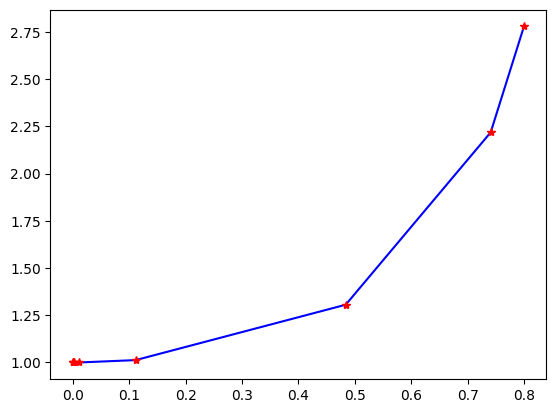

0.007290169107527595


In [ ]:
from scipy.integrate import solve_ivp

def f(t, y):
  return 2*t*y**2

def exa(t):
  return 1/(1-t**2)

y_apro = solve_ivp(f, [0, 0.8], [1])
print(y_apro.t)
print(y_apro.y)
plt.plot(y_apro.t, exa(y_apro.t), "b")
plt.plot(y_apro.t, y_apro.y[0], "r*")
plt.show()

error = np.linalg.norm(exa(y_apro.t)-y_apro.y[0],2)/np.linalg.norm(exa(y_apro.t),2)*100
print(error)

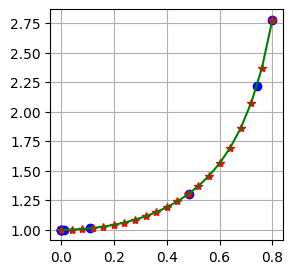

In [ ]:
plt.figure(figsize = [3, 3])
plt.plot(y_apro.t, y_apro.y[0], "bo")
[t2, y2] = edo_RK4(f, 0, 0.8, 20, 1)
plt.plot(t2, y2, "r*")
t3 = np.linspace(0, 0.8, 100)
plt.plot(t2, exa(t2), "g")
plt.grid()

In [ ]:
[t2, y_aprox2] = edo_RK4(f, 0, 0.8, 8, 1)
y_aprox = solve_ivp(f, [0, 0.8], [1], t_eval = t2)
t1 = y_aprox.t
print(t1, len(t1))
y_aprox1 = y_aprox.y[0]
error1 = np.linalg.norm(exa(t1) - y_aprox1, 2)/(np.linalg.norm(exa(t1), 2)) * 100
error2 = np.linalg.norm(exa(t2) - y_aprox2, 2)/(np.linalg.norm(exa(t2), 2)) * 100
print(error1, error2)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8] 9
0.04059245178467685 0.014344366224347163


# solve ivp para sistemas

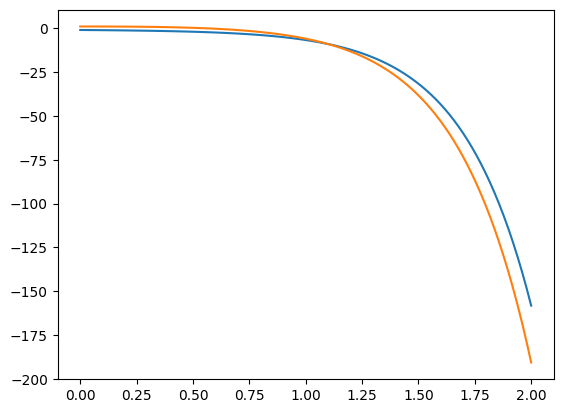

In [ ]:
def f(t,y):
  f1 = 2*y[0]+y[1]-np.exp(2*t)
  f2 = y[0]+2*y[1]
  return [f1, f2]

sist_apro = solve_ivp(f, [0, 2], [1, -1], t_eval=np.linspace(0, 2, 100))
t1 = sist_apro.t
[x_aprox, y_aprox] = sist_apro.y
plt.plot(t1, y_aprox)
plt.plot(t1, x_aprox)
plt.show()

# EJercicio

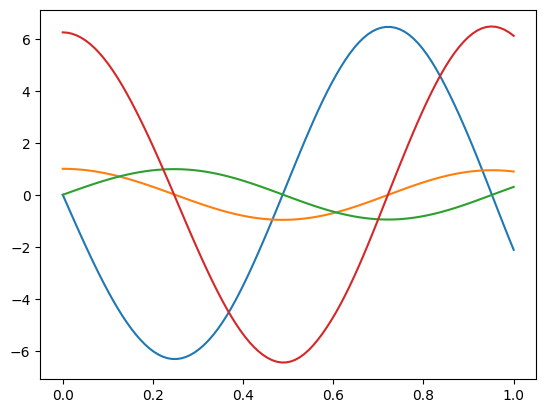

In [ ]:
def f(t,y):
  f1 = y[1]
  f2 = -4*np.pi**2*(y[0]/((y[0]**2)+(y[2]**2))**(3/2))
  f3 = y[3]
  f4 = -4*np.pi**2*(y[2]/((y[0]**2)+(y[2]**2))**(3/2))
  return [f1, f2, f3, f4]

sist_apro = solve_ivp(f, [0, 1], [1, 0, 0, 6.25], t_eval=np.linspace(0, 1, 100))
t1 = sist_apro.t
[x_aprox, y_aprox, h_aprox, g_aprox] = sist_apro.y
plt.plot(t1, y_aprox)
plt.plot(t1, x_aprox)
plt.plot(t1, h_aprox)
plt.plot(t1, g_aprox)
plt.show()

0.11837808822404772


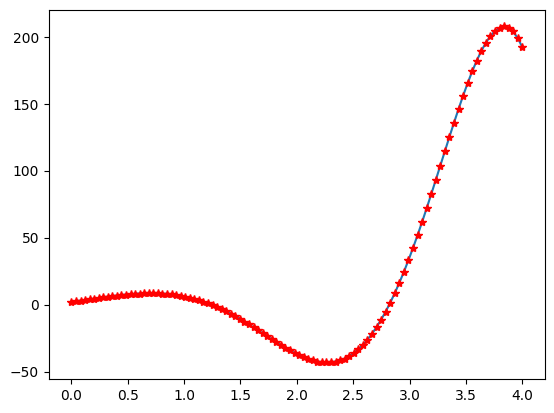

In [ ]:
def f(t,x):
  f1 = x[1]
  f2 = -5*x[0] + 2*x[1] - 8*np.exp(-t)
  return [f1, f2]

t = np.linspace(0,4,100)

sist_apro = solve_ivp(f, [0, 4], [2, 12], t_eval=t)
t1 = sist_apro.t

def real(t):
  return 3*np.exp(t)*np.cos(2*t)+4*np.exp(t)*np.sin(2*t)-np.exp(-t)

plt.plot(t1, real(t1))
plt.plot(t1, x_aprox, "r*")

error = np.linalg.norm(real(t1)-x_aprox,2)/np.linalg.norm(real(t1),2)*100
print(error)